# Data Preprocessing

In [ ]:
import os
import random
import shutil
from PIL import Image
import matplotlib.pyplot as plt

# Paths
RAW_DIR = "../data/raw"
OUTPUT_DIR = "../data/processed"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Classes
classes = ["Cat", "Dog"]

# Split ratios
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

# Target size for resizing
IMAGE_SIZE = (128, 128)

Creating helper functions for preprocessing

In [ ]:
def make_dirs(base_dir, classes):
    """Create train/val/test folders for each class."""
    for split in ["train", "val", "test"]:
        for cls in classes:
            path = os.path.join(base_dir, split, cls)
            os.makedirs(path, exist_ok=True)

def split_and_copy(raw_dir, output_dir, classes, train_ratio, val_ratio, test_ratio, image_size):
    """Split dataset and copy resized images into train/val/test folders."""
    make_dirs(output_dir, classes)

    for cls in classes:
        cls_dir = os.path.join(raw_dir, cls)
        files = os.listdir(cls_dir)
        random.shuffle(files)

        n_total = len(files)
        n_train = int(train_ratio * n_total)
        n_val = int(val_ratio * n_total)

        train_files = files[:n_train]
        val_files = files[n_train:n_train+n_val]
        test_files = files[n_train+n_val:]

        # Helper for copying + resizing
        def process(files, split):
            for fname in files:
                src_path = os.path.join(cls_dir, fname)
                dst_path = os.path.join(output_dir, split, cls, fname)

                try:
                    img = Image.open(src_path).convert("RGB")
                    img = img.resize(image_size)
                    img.save(dst_path)
                except Exception as e:
                    print(f"Skipping corrupted {src_path}: {e}")

        process(train_files, "train")
        process(val_files, "val")
        process(test_files, "test")

Running the split

In [3]:
split_and_copy(
    RAW_DIR,
    OUTPUT_DIR,
    classes,
    train_ratio,
    val_ratio,
    test_ratio,
    IMAGE_SIZE
)

print("✅ Splitting & resizing done!")

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


✅ Splitting & resizing done!


In [5]:
# Checking results
for split in ["train", "val", "test"]:
    for cls in classes:
        folder = os.path.join(OUTPUT_DIR, split, cls)
        print(split, cls, ":", len(os.listdir(folder)))

train Cat : 8749
train Dog : 8749
val Cat : 1874
val Dog : 1874
test Cat : 1876
test Dog : 1876


Let's visualize some somples and see if the preprocessing script works okay.

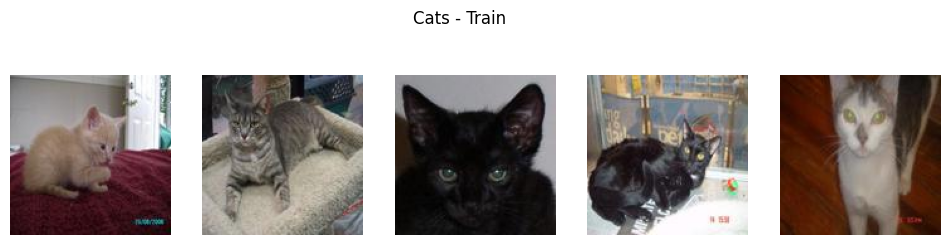

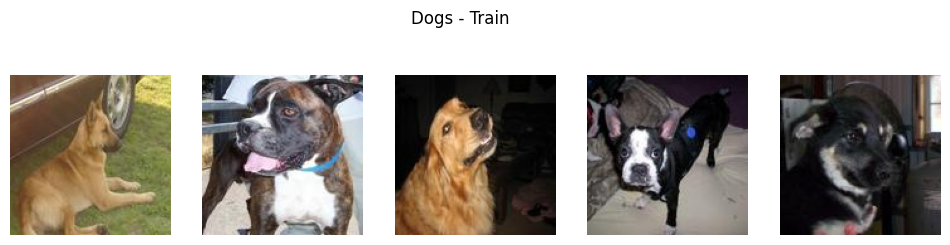

In [7]:
def show_samples(folder, title, n=5):
    files = os.listdir(folder)
    plt.figure(figsize=(12, 3))
    for i in range(n):
        fname = random.choice(files)
        img = Image.open(os.path.join(folder, fname))
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_samples(os.path.join(OUTPUT_DIR, "train", "Cat"), "Cats - Train")
show_samples(os.path.join(OUTPUT_DIR, "train", "Dog"), "Dogs - Train")

The images are resized into 128x128, and everything seems okay.